# Model:
Here we have a crucial step where we take our tidy data and run some models on it. Selecting the right model is a bit of trial and error. However you can optimize they models themselves by running a grid search on the model's hyperparameters which is what I did here. Doing so minimimized the trial and error on my end and allowed our models to have a significant imporvent overbasseline withou overfitting as we are able to see by comparing them on to the validate set. After experimentation whith each model, we pick the best one to run our test on and obtain predictions. All of our work led up to this step.

This is the Tidy Dataset:



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender_encoded                          7043 non-null   int64  
 1   partner_encoded                         7043 non-null   int64  
 2   dependents_encoded                      7043 non-null   int64  
 3   phone_service_encoded                   7043 non-null   int64  
 4   paperless_billing_encoded               7043 non-null   int64  
 5   churn_encoded                           7043 non-null   int64  
 6   senior_citizen                          7043 non-null   int64  
 7   tenure                                  7043 non-null   int64  
 8   monthly_charges                         7043 non-null   float64
 9   total_charges                           7043 non-null   object 
 10  total_in_household             

,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,senior_citizen,tenure,monthly_charges,total_charges,...,contract_type_month-to-month,contract_type_one_year,contract_type_two_year,internet_service_type_dsl,internet_service_type_fiber_optic,internet_service_type_none,payment_type_bank_transfer_(automatic),payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
head_1,1,1,1,1,1,0,0,9,65.6,593.3,...,0,1,0,1,0,0,0,0,0,1
head_2,0,0,0,1,0,0,0,9,59.9,542.4,...,1,0,0,1,0,0,0,0,0,1
head_3,0,0,0,1,1,1,0,4,73.9,280.85,...,1,0,0,0,1,0,0,0,1,0
dtypes,int64,int64,int64,int64,int64,int64,int64,int64,float64,object,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
count,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043,...,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.495244,0.483033,0.299588,0.903166,0.592219,0.26537,0.162147,32.371149,64.761692,NaN,...,0.550192,0.209144,0.240664,0.343746,0.439585,0.216669,0.219225,0.216101,0.335794,0.22888
std,0.500013,0.499748,0.45811,0.295752,0.491457,0.441561,0.368612,24.559481,30.090047,NaN,...,0.49751,0.406726,0.427517,0.474991,0.496372,0.412004,0.413751,0.411613,0.472301,0.420141


(7043, 42)

None

<AxesSubplot:title={'center':'Unique values per column'}>

,Length,Width
Prepared Data,7043,42
Train,4225,42
Validate,1409,42
Test,1409,42


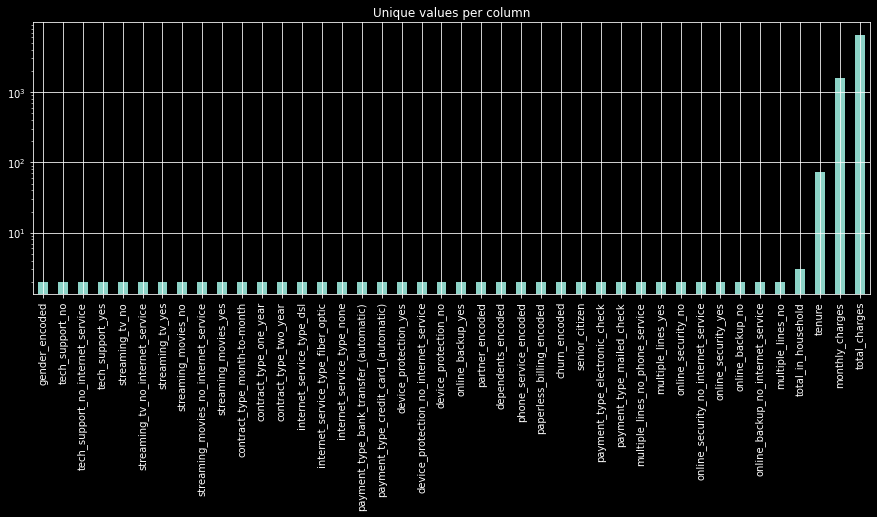

In [2]:
from model import *

random=4563
df=get_telco_tidy()

X_train,y_train,X_validate,y_validate,X_test,y_test=X_y_all(df)#split our data one last time to target 

In [3]:
# Establish our baseline prediction 
baseline = y_train.mode()

# Next let establish a baseline accuracy
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")






Baseline prediction: 0
Baseline accuracy: 0.73


# Model Fitting

---- 
# RandomForest

Random~Forest

,"Parameters:{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 4563}]"
diff,0.0
train_score,0.8
validate_score,0.8


,0,1,accuracy,macro avg,weighted avg
precision,0.824556,0.694938,0.80213,0.759747,0.790165
recall,0.928157,0.453167,0.80213,0.690662,0.802130
f1-score,0.873295,0.548596,0.80213,0.710946,0.787144
support,3104.000000,1121.000000,0.80213,4225.000000,4225.000000


Matrix([
[2881, 223],
[ 613, 508]])

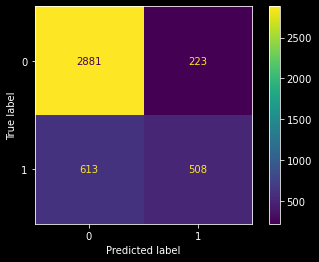

In [4]:
random_forest(X_train,y_train,X_validate,y_validate,X_test,y_test,random)

# KNN


KNN

,"Parameters:{'leaf_size': 20, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}]"
diff,0.04
train_score,0.82
validate_score,0.78


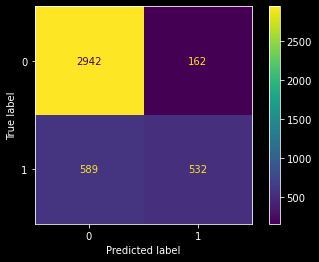

In [5]:
knn(X_train,y_train,X_validate,y_validate,X_test,y_test)

# Decision Tree

Decision~Tree~Classifier

,"Parameters:{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'log2', 'random_state': 4563}]"
diff,0.02
train_score,0.76
validate_score,0.74


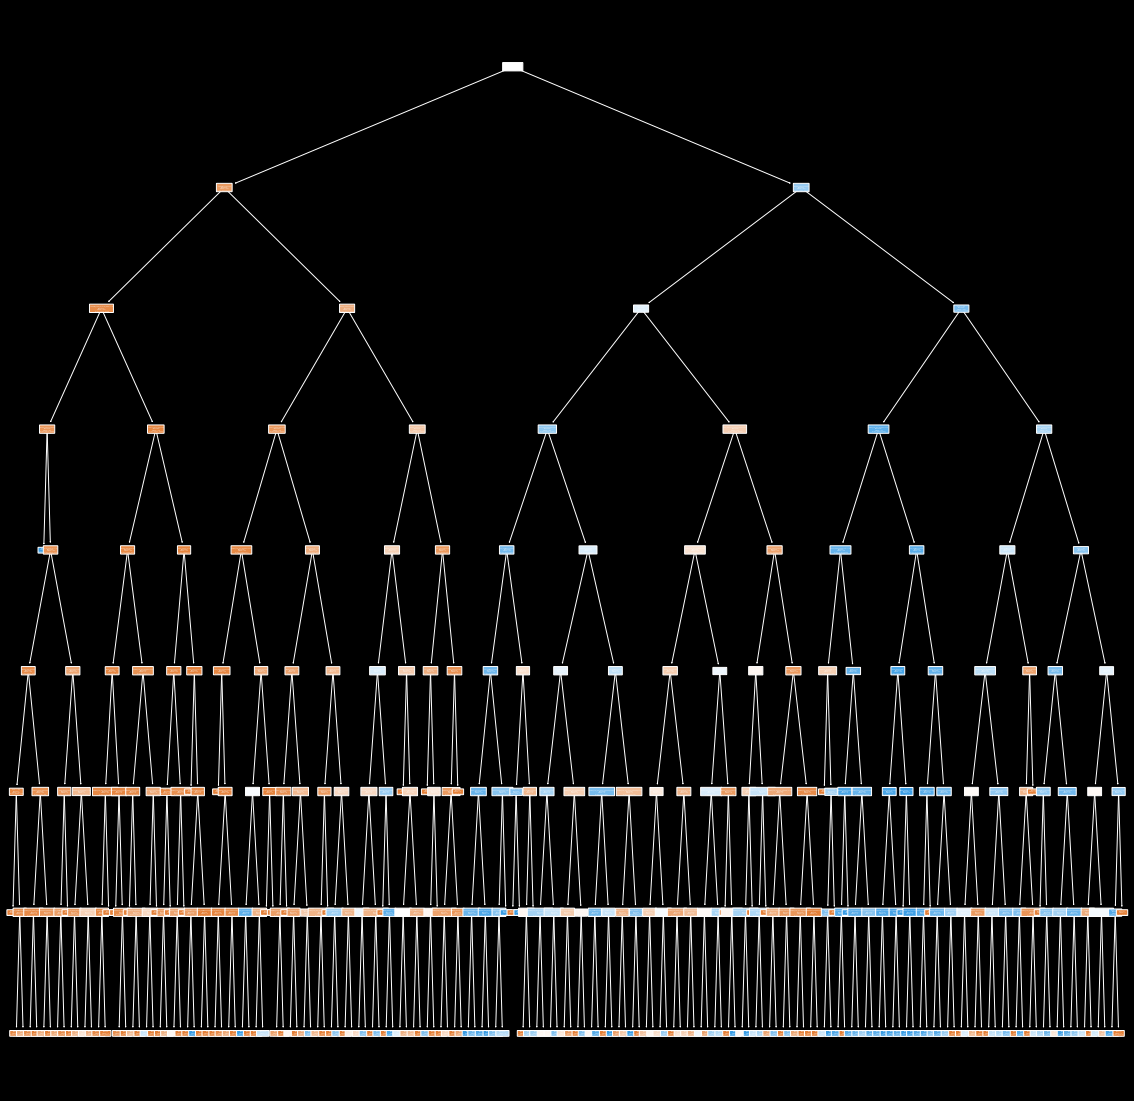

In [6]:
decision_tree(X_train,y_train,X_validate,y_validate,X_test,y_test,random)

# Logistic Regression

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic~Regression

,"Parameters:{'C': 5.336699231206307, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs', 'random_state': 4563}]"
diff,0.01
train_score,0.75
validate_score,0.76


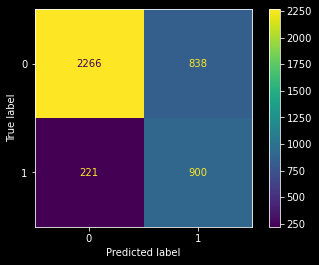

,0,1,accuracy,macro avg,weighted avg
precision,0.911138,0.517837,0.749349,0.714487,0.806785
recall,0.730026,0.802855,0.749349,0.766440,0.749349
f1-score,0.810588,0.629591,0.749349,0.720090,0.762565
support,3104.000000,1121.000000,0.749349,4225.000000,4225.000000


In [7]:
logistic_reg(X_train,y_train,X_validate,y_validate,X_test,y_test,random)

In [10]:



    

# Make the model
forest1 = RandomForestClassifier(max_depth=10, random_state=123)
forest_params=forest1.get_params()
forest_params={'n_estimators': [10,100],'max_features':['sqrt'],'max_depth':[5,20],'criterion':['gini']}


# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_pred_forest = forest1.predict(X_train)


precision = precision_score(y_train, y_pred_forest)
precision
# grid_search_rf = GridSearchCV(estimator=forest1, param_grid=forest_params, cv= 20, scoring='precision')
# grid_search_rf.fit(X_train, y_train)
# gs_rf_params = grid_search_rf.best_params_
# gs_rf_params.update({'random_state':random})
gs_rf_params={'criterion': 'gini',
'max_depth': 5,
'max_features': 'sqrt',
'n_estimators': 100,
'random_state': 4563}
forest_opt = RandomForestClassifier(**gs_rf_params)
# Fit the model (on train and only train)
forest_opt.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_pred_forest_opt = forest_opt.predict(X_train)

opt_rf= RandomForestClassifier(**gs_rf_params)
# Fit the model (on train and only train)
opt_rf_dict={}
opt_rf.fit(X_train, y_train)
opt_rf_dict[f'Parameters:{gs_rf_params}]'] = {
'train_score': round(opt_rf.score(X_train, y_train), 2),
'validate_score': round(opt_rf.score(X_validate, y_validate), 2),
'test_score':round(opt_rf.score(X_test, y_test), 2),
'diff train test': round(abs(opt_rf.score(X_train, y_train)-opt_rf.score(X_test, y_test)),2)}
display(symbols("Random~Forest~Test"),pd.DataFrame(opt_rf_dict))


Random~Forest~Test

,"Parameters:{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 4563}]"
diff train test,0.0
test_score,0.8
train_score,0.8
validate_score,0.8


ValueError: Found input variables with inconsistent numbers of samples: [1409, 4225]